# Analysis of US Birth from 1994 - 2014

This is my first analysis project, so I choose some simple data to get start. The data I choose are US birth data from 1994 - 2004 and 2004 - 2014. These two datasets are under the same format, they have the following columns:

* year: the birth year
* month: the birth month
* date_of_momth: the birth date of a month
* day_of_week: the birth day of a week
* births: the total number of birth

## Questions to answer

Right after finding these two datasets, there are several questions that I want to figure out:

* During these 20 years, is there a year that has significant more new births than the other?
* Within a year, which month has the most new babies?
* Within a week, what day has the most new babies?
* I am interested in the 12 zodiacs, so which zodiac has the most people for the past 20 years.

I will import necessary modules first before diging into these datasets.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

To get start, I need to explore the data by reading the data to a table and get the general overview of the whole data.

Read the first dataset:

In [2]:
data1 = pd.read_csv('US_births_1994-2003_CDC_NCHS.csv')
data1.head()

,year,month,date_of_month,day_of_week,births
0,1994,1,1,6,8096
1,1994,1,2,7,7772
2,1994,1,3,1,10142
3,1994,1,4,2,11248
4,1994,1,5,3,11053


In [3]:
data1.describe()

,year,month,date_of_month,day_of_week,births
count,3652.000000,3652.000000,3652.000000,3652.000000,3652.000000
mean,1998.499726,6.523549,15.727820,3.999726,10876.817360
std,2.872293,3.449005,8.800529,2.000753,1858.566631
min,1994.000000,1.000000,1.000000,1.000000,6443.000000
25%,1996.000000,4.000000,8.000000,2.000000,8844.500000
50%,1998.500000,7.000000,16.000000,4.000000,11615.000000
75%,2001.000000,10.000000,23.000000,6.000000,12274.250000
max,2003.000000,12.000000,31.000000,7.000000,14540.000000


Read the second dataset:

In [4]:
data2 = pd.read_csv('US_births_2000-2014_SSA.csv')
data2.head()

,year,month,date_of_month,day_of_week,births
0,2000,1,1,6,9083
1,2000,1,2,7,8006
2,2000,1,3,1,11363
3,2000,1,4,2,13032
4,2000,1,5,3,12558


In [5]:
data2.describe()

,year,month,date_of_month,day_of_week,births
count,5479.000000,5479.000000,5479.000000,5479.000000,5479.000000
mean,2006.999270,6.522723,15.730243,3.999817,11350.068261
std,4.321085,3.449075,8.801151,2.000502,2325.821049
min,2000.000000,1.000000,1.000000,1.000000,5728.000000
25%,2003.000000,4.000000,8.000000,2.000000,8740.000000
50%,2007.000000,7.000000,16.000000,4.000000,12343.000000
75%,2011.000000,10.000000,23.000000,6.000000,13082.000000
max,2014.000000,12.000000,31.000000,7.000000,16081.000000


Based on the two results above, we can see there are some overlap between these two datasets, which are the birth data from year 2000 to 2004. Before doing the analysis, we need to remove the duplicates to make the data clean. To achieve, I will drop the 2000-2003 data in table 2. 

To make this process easier, instead of removing the undesired data from the second dataset, I will directly choose the part of the data from it.

In [6]:
year_2004 = min(list(data2[data2['year'] == 2004].index))
data2 = data2.loc[year_2004:]
data2.describe()

,year,month,date_of_month,day_of_week,births
count,4018.000000,4018.000000,4018.000000,4018.000000,4018.000000
mean,2008.999253,6.522648,15.730463,4.000000,11364.880538
std,3.162868,3.449210,8.801536,2.000249,2399.338911
min,2004.000000,1.000000,1.000000,1.000000,5728.000000
25%,2006.000000,4.000000,8.000000,2.000000,8629.000000
50%,2009.000000,7.000000,16.000000,4.000000,12362.500000
75%,2012.000000,10.000000,23.000000,6.000000,13158.750000
max,2014.000000,12.000000,31.000000,7.000000,16081.000000


After extract the table 2 data I want, I can concatenate the two datasets together.

In [7]:
data = pd.concat([data1, data2], join = 'outer', ignore_index = True)
data.head()

,year,month,date_of_month,day_of_week,births
0,1994,1,1,6,8096
1,1994,1,2,7,7772
2,1994,1,3,1,10142
3,1994,1,4,2,11248
4,1994,1,5,3,11053


In [8]:
data.describe()

,year,month,date_of_month,day_of_week,births
count,7670.000000,7670.000000,7670.000000,7670.000000,7670.000000
mean,2004.000000,6.523077,15.729205,3.999870,11132.493742
std,6.055444,3.448888,8.800483,2.000359,2172.398653
min,1994.000000,1.000000,1.000000,1.000000,5728.000000
25%,1999.000000,4.000000,8.000000,2.000000,8759.000000
50%,2004.000000,7.000000,16.000000,4.000000,11941.000000
75%,2009.000000,10.000000,23.000000,6.000000,12754.750000
max,2014.000000,12.000000,31.000000,7.000000,16081.000000


Before doing any analysis, I need to make sure the datasets are clean, and doesn't have null value within the data.

In [9]:
data.isnull().any()

year             False
month            False
date_of_month    False
day_of_week      False
births           False
dtype: bool

Since the dataset is clean, I can start to figure out the questions I have. The first one to answer is which year has a bigher birth rate than the other.

To answer this question, two steps need to be done. First is to calculate the total number of birth each year.

In [10]:
birth_total = data.pivot_table(index = 'year', values = 'births', aggfunc = 'sum')
birth_total.sort_values()

year
1997    3880894
1996    3891494
1995    3899589
1998    3941553
1994    3952767
1999    3959417
2013    3973337
2012    4000868
2011    4006908
2014    4010532
2002    4021726
2001    4025933
2010    4055975
2000    4058814
2003    4089950
2004    4186863
2009    4190991
2005    4211941
2008    4310737
2006    4335154
2007    4380784
Name: births, dtype: int64

Second is to rank them, and find out the top three.

In [11]:
# Find the index of top three rank

birth_total.rank(ascending = False)

year
1994    17.0
1995    19.0
1996    20.0
1997    21.0
1998    18.0
1999    16.0
2000     8.0
2001    10.0
2002    11.0
2003     7.0
2004     6.0
2005     4.0
2006     2.0
2007     1.0
2008     3.0
2009     5.0
2010     9.0
2011    13.0
2012    14.0
2013    15.0
2014    12.0
Name: births, dtype: float64

In [12]:
print(birth_total.index.get_loc(2007))
print(birth_total.index.get_loc(2006))
print(birth_total.index.get_loc(2008))

13
12
14


After getting the highest three years, it is time to draw a plot to visualize it. I also want to highlight the three years that have highest birth rate.

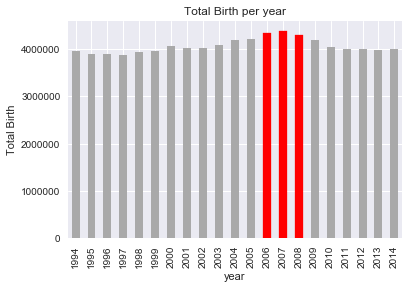

In [13]:
fig, ax = plt.subplots(1, 1)
ax = birth_total.sort_index().plot(kind = 'bar', legend = None, title = 'Total Birth per year', color = 'darkgrey')

ax.tick_params(bottom = 'off', top = 'off', left = 'off', right = 'off')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_ylabel('Total Birth')

for item in ax.containers:
    item[12].set_color('r')
    item[13].set_color('r')
    item[14].set_color('r')

We can apply similar procedure to find out which month has a higher birth rate than the others.

In [14]:
monthly_birth = data.pivot_table(index = 'month', values = 'births', columns = 'date_of_month', aggfunc = 'sum', margins = True)
monthly_birth

date_of_month,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,All
month,,,,,,,,,,,,,,,,,,,,,
1,163634.0,195438.0,227065.0,231393.0,230016.0,229123.0,229425.0,222812.0,223106.0,231484.0,...,228174.0,232027.0,229963.0,227708.0,227275.0,227537.0,221916.0,225786.0,228541.0,6951352.0
2,229502.0,229927.0,227696.0,229003.0,224376.0,226671.0,234124.0,232320.0,228750.0,231315.0,...,229461.0,228982.0,230449.0,225264.0,228012.0,232119.0,52311.0,NaN,NaN,6487269.0
3,233702.0,226838.0,232551.0,230771.0,230562.0,229342.0,232836.0,230499.0,226059.0,229743.0,...,225526.0,229350.0,230461.0,228655.0,228787.0,231949.0,228324.0,224988.0,226352.0,7121938.0
4,216297.0,231094.0,228874.0,235599.0,228895.0,223412.0,228038.0,228696.0,227434.0,227349.0,...,228139.0,227737.0,230918.0,228525.0,223953.0,226855.0,225430.0,225342.0,NaN,6826843.0
5,231037.0,233369.0,228967.0,225057.0,232524.0,229937.0,229852.0,230055.0,231850.0,232501.0,...,242023.0,238704.0,227365.0,218411.0,224560.0,226743.0,226412.0,228918.0,225099.0,7150547.0
6,234440.0,238251.0,236376.0,235649.0,234446.0,236038.0,234361.0,231515.0,232749.0,235672.0,...,236121.0,237892.0,239533.0,238861.0,243399.0,242688.0,238372.0,242491.0,NaN,7098069.0
7,249059.0,248396.0,237377.0,184726.0,218494.0,241224.0,254269.0,250820.0,247140.0,246494.0,...,245670.0,243751.0,247122.0,243208.0,239616.0,243887.0,243449.0,243585.0,241831.0,7500795.0
8,247265.0,243185.0,237974.0,242941.0,243819.0,243313.0,243374.0,250965.0,246144.0,241304.0,...,244764.0,240490.0,243093.0,244010.0,246487.0,248946.0,250412.0,247801.0,242658.0,7595922.0
9,229527.0,230998.0,233495.0,235544.0,240059.0,237162.0,239353.0,251822.0,258312.0,254993.0,...,251447.0,250850.0,249194.0,251850.0,249076.0,242638.0,243005.0,241263.0,NaN,7411299.0


After grouping the datasets by month, I can rank it to find the month that has highest birth rate.

In [15]:
monthly_birth['All'][:-1].sort_values()

month
2     6487269.0
4     6826843.0
11    6854860.0
1     6951352.0
6     7098069.0
3     7121938.0
12    7123246.0
5     7150547.0
10    7264087.0
9     7411299.0
7     7500795.0
8     7595922.0
Name: All, dtype: float64

It is time to draw the plot to visualize the montly birth rate. 

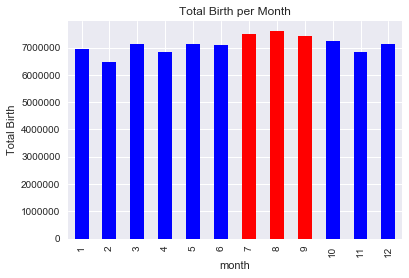

In [16]:
colors = ['b', 'b', 'b', 'b', 'b', 'b', 'r', 'r', 'r', 'b', 'b', 'b']
my_plot = monthly_birth['All'][:-1].plot(kind = 'bar', legend = None, title = 'Total Birth per Month', color = colors)
my_plot.tick_params(top = 'off', bottom = 'off', left = 'off', right = 'off')
my_plot.spines['right'].set_visible(False)
my_plot.spines['left'].set_visible(False)
my_plot.spines['top'].set_visible(False)
my_plot.set_ylabel('Total Birth')

Since I am interested in figuring out which zodiacs has most people, I will need to first build a zodiacs list, and write a function to get the zodiacs.

In [17]:
zodiacs_list = ['Capricorn', 'Aquarius', 'Pisces', 'Aries', 'Taurus', 'Gemini', 'Cancer', 'Leo', 'Bergo', 'Libra',
               'Scorpio', 'Sagittarius']
zodiacs = [(119, 'Capricorn'), (217, 'Aquarius'), (319, 'Pisces'), (419, 'Aries'), (520, 'Taurus'),
           (620, 'Gemini'), (721, 'Cancer'), (822, 'Leo'), (922, 'Virgo'), (1022, 'Libra'),
           (1121, 'Scorpio'), (1221, 'Sagittarius'), (1231, 'Capricorn')]

In [18]:
def get_zodiac(row):
    day = row[1]*100 + row[2]
    for z in zodiacs:
        if day <= z[0]:
            return z[1]

I can use the function and list to get the zodiacs information for my dataset, and insert another column to show the zodiacs information.

In [19]:
zod = data.apply(get_zodiac, axis = 1)
data.insert(3, column = 'zodiacs', value = zod)
data.head()

,year,month,date_of_month,zodiacs,day_of_week,births
0,1994,1,1,Capricorn,6,8096
1,1994,1,2,Capricorn,7,7772
2,1994,1,3,Capricorn,1,10142
3,1994,1,4,Capricorn,2,11248
4,1994,1,5,Capricorn,3,11053


Similar to analyzing yearly and monthly birth amount, I can figure out which zodiacs has the highest birth rate.

In [20]:
zod = data.pivot_table(index = 'zodiacs', values = 'births', aggfunc = 'sum', margins = True)
zod = zod.sort_values()
zod

zodiacs
Capricorn       6400741.0
Aquarius        6641372.0
Sagittarius     6878050.0
Pisces          6944942.0
Scorpio         6988768.0
Aries           7079969.0
Taurus          7116377.0
Libra           7177620.0
Gemini          7239348.0
Cancer          7453612.0
Virgo           7640637.0
Leo             7824791.0
All            85386227.0
Name: births, dtype: float64

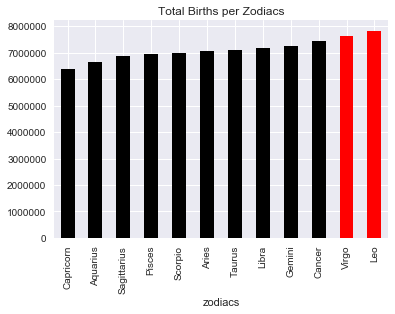

In [21]:
colors = list('kkkkkkkkkkrr')
my_plot = zod[:-1].plot(kind = 'bar', legend = None, title = 'Total Births per Zodiacs', color = colors)
my_plot.tick_params(top = 'off', bottom = 'off', left = 'off', right = 'off')
my_plot.spines['right'].set_visible(False)
my_plot.spines['left'].set_visible(False)
my_plot.spines['top'].set_visible(False)

Last but not the least, I want to figure out what day of a week has the biggest amount of births.

In [22]:
dow = data.groupby('day_of_week')['births'].sum()
dow

day_of_week
1    12672592
2    14015353
3    13775310
4    13691289
5    13473095
6     9417666
7     8340922
Name: births, dtype: int64

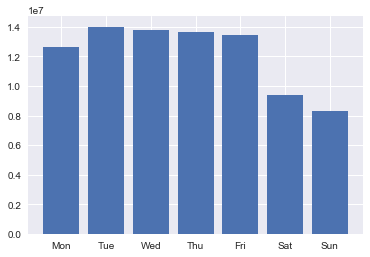

In [23]:
plt.bar([1, 2, 3, 4, 5, 6, 7], dow.values, align = 'center')
plt.xticks([1, 2, 3, 4, 5, 6, 7],['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

It is quite interesting to me that weekend birth rates are much lower than weekdays. This might because there are not as many hospitals and doctors available open as weekends. 

Since this is a practice project, I want to practice drawing plots that combine yearly births and month births together. This plot is for practice and future uses. There is not much information showing.

            births
year month        
1994 1      320705
     2      301327
     3      339736
     4      317392
     5      330295


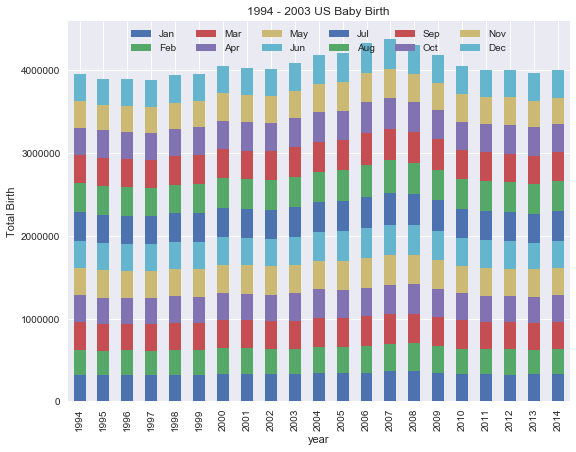

In [24]:
birth = data[['year','month','births']].groupby(['year', 'month']).sum()
print(birth.head())
my_plot = birth.unstack().plot(kind = 'bar', stacked = True, title = '1994 - 2003 US Baby Birth', figsize = [9, 7])
my_plot.set_ylabel('Total Birth')
my_plot.legend(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], loc = 9, ncol = 6)